# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
!pip install citipy

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import urllib
from scipy import stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather dat
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | port lincoln
Processing Record 3 of Set 1 | matara
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 6 of Set 1 | ghoti
Processing Record 7 of Set 1 | port macquarie
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | marcona
City not found. Skipping...
Processing Record 10 of Set 1 | shar
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | lebu
Processing Record 14 of Set 1 | haines junction
Processing Record 15 of Set 1 | nantucket
Processing Record 16 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | chokurdakh
Processing Record 19 of Set 1 | dikson
Processing Record 20 of Set 1 | cabo san lucas
Processing Record 21 of S

Processing Record 37 of Set 4 | kuito
Processing Record 38 of Set 4 | san cristobal
Processing Record 39 of Set 4 | karratha
Processing Record 40 of Set 4 | caravelas
Processing Record 41 of Set 4 | saldanha
Processing Record 42 of Set 4 | tasiilaq
Processing Record 43 of Set 4 | san quintin
Processing Record 44 of Set 4 | namibe
Processing Record 45 of Set 4 | thiers
Processing Record 46 of Set 4 | zaria
Processing Record 47 of Set 4 | broken hill
Processing Record 48 of Set 4 | kazalinsk
City not found. Skipping...
Processing Record 49 of Set 4 | kavieng
Processing Record 0 of Set 5 | tateyama
Processing Record 1 of Set 5 | khatanga
Processing Record 2 of Set 5 | esfarayen
Processing Record 3 of Set 5 | petropavlovsk-kamchatskiy
Processing Record 4 of Set 5 | akyab
Processing Record 5 of Set 5 | sioux lookout
Processing Record 6 of Set 5 | honningsvag
Processing Record 7 of Set 5 | saskylakh
Processing Record 8 of Set 5 | jonkoping
Processing Record 9 of Set 5 | panguma
Processing Re

Processing Record 28 of Set 8 | sarakhs
Processing Record 29 of Set 8 | honiara
Processing Record 30 of Set 8 | adre
Processing Record 31 of Set 8 | hamilton
Processing Record 32 of Set 8 | linxia
Processing Record 33 of Set 8 | novikovo
Processing Record 34 of Set 8 | maniitsoq
Processing Record 35 of Set 8 | tura
Processing Record 36 of Set 8 | bethel
Processing Record 37 of Set 8 | galle
Processing Record 38 of Set 8 | jalpa
Processing Record 39 of Set 8 | dingle
Processing Record 40 of Set 8 | upata
Processing Record 41 of Set 8 | wad madani
Processing Record 42 of Set 8 | anadyr
Processing Record 43 of Set 8 | tiarei
Processing Record 44 of Set 8 | atascocita
Processing Record 45 of Set 8 | kununurra
Processing Record 46 of Set 8 | port hardy
Processing Record 47 of Set 8 | nakamura
Processing Record 48 of Set 8 | coahuayana
Processing Record 49 of Set 8 | ketchikan
Processing Record 0 of Set 9 | marzuq
Processing Record 1 of Set 9 | noumea
Processing Record 2 of Set 9 | burica
Ci

Processing Record 17 of Set 12 | kahului
Processing Record 18 of Set 12 | rovnoye
Processing Record 19 of Set 12 | henties bay
Processing Record 20 of Set 12 | salta
Processing Record 21 of Set 12 | banda aceh
Processing Record 22 of Set 12 | kenai
Processing Record 23 of Set 12 | dovers
Processing Record 24 of Set 12 | mackenzie
Processing Record 25 of Set 12 | pula
Processing Record 26 of Set 12 | inhambane
Processing Record 27 of Set 12 | bukachacha
Processing Record 28 of Set 12 | safaqis
City not found. Skipping...
Processing Record 29 of Set 12 | balkanabat
Processing Record 30 of Set 12 | labuhan
Processing Record 31 of Set 12 | kodinsk
Processing Record 32 of Set 12 | kochi
Processing Record 33 of Set 12 | leshukonskoye
Processing Record 34 of Set 12 | harper
Processing Record 35 of Set 12 | the pas
Processing Record 36 of Set 12 | tuensang
Processing Record 37 of Set 12 | pochutla
Processing Record 38 of Set 12 | kushiro
Processing Record 39 of Set 12 | hailar
Processing Recor

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()


City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapaa,22.0752,-159.3190,23.99,90,9,0.45,US,1680548478
1,port lincoln,-34.7333,135.8667,17.63,72,5,2.52,AU,1680548478
2,matara,5.9485,80.5353,24.97,87,72,0.56,LK,1680548479
3,jamestown,42.0970,-79.2353,16.80,41,0,5.14,US,1680548315
4,ghoti,19.7168,73.6245,22.48,64,0,0.49,IN,1680548480


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/city.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/city.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapaa,22.0752,-159.3190,23.99,90,9,0.45,US,1680548478
1,port lincoln,-34.7333,135.8667,17.63,72,5,2.52,AU,1680548478
2,matara,5.9485,80.5353,24.97,87,72,0.56,LK,1680548479
3,jamestown,42.0970,-79.2353,16.80,41,0,5.14,US,1680548315
4,ghoti,19.7168,73.6245,22.48,64,0,0.49,IN,1680548480


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [9]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

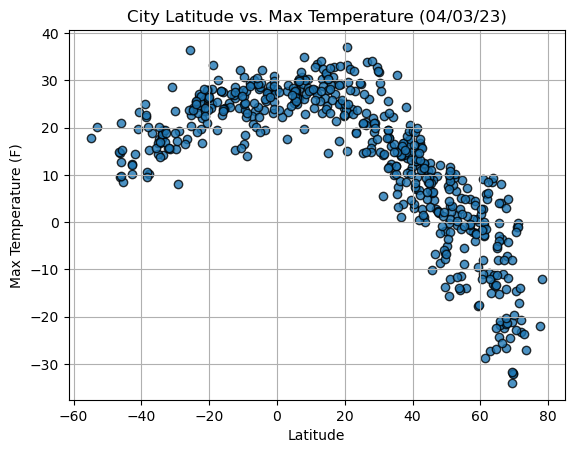

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

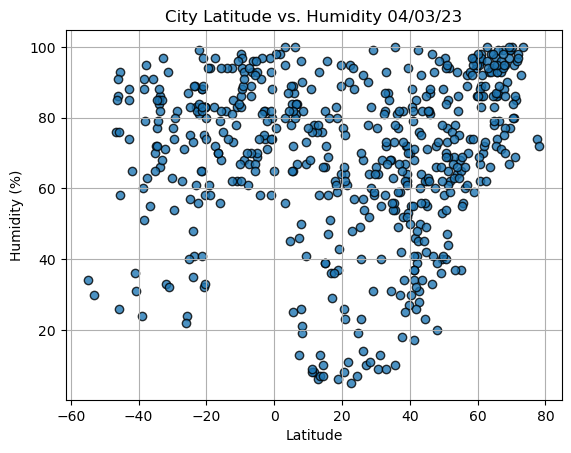

In [11]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

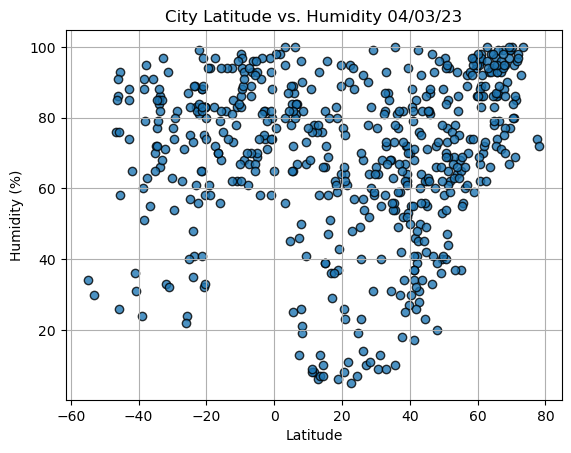

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

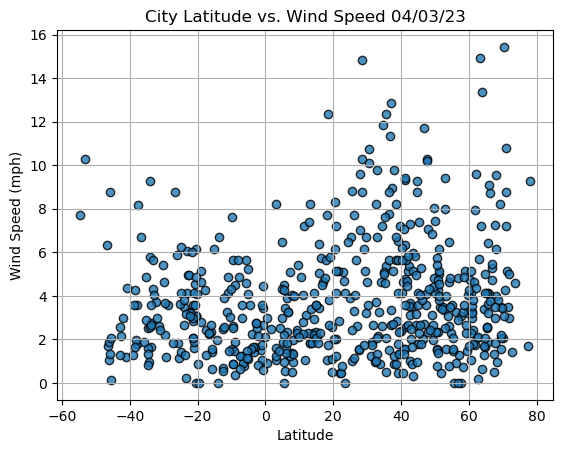

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
   
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    print(f"The r-value is: {rvalue}")
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapaa,22.0752,-159.3190,23.99,90,9,0.45,US,1680548478
2,matara,5.9485,80.5353,24.97,87,72,0.56,LK,1680548479
3,jamestown,42.0970,-79.2353,16.80,41,0,5.14,US,1680548315
4,ghoti,19.7168,73.6245,22.48,64,0,0.49,IN,1680548480
7,shar,49.5886,81.0453,-1.84,53,0,2.66,KZ,1680548486


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port lincoln,-34.7333,135.8667,17.63,72,5,2.52,AU,1680548478
5,port macquarie,-31.4333,152.9167,15.50,93,21,2.63,AU,1680548480
6,busselton,-33.6500,115.3333,14.11,86,8,2.74,AU,1680548484
8,port elizabeth,-33.9180,25.5701,18.94,85,0,9.26,ZA,1680548486
9,ushuaia,-54.8000,-68.3000,17.81,34,20,7.72,AR,1680548346


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8744968670921633


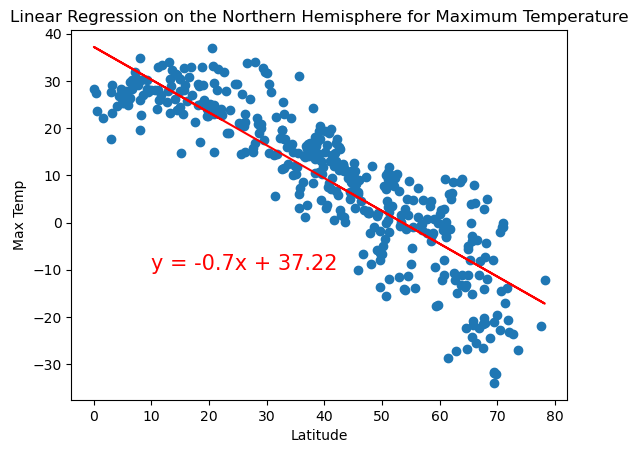

In [17]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values,
                       title='Linear Regression on the Northern Hemisphere for Maximum Temperature',
                       y_label='Max Temp', 
                       text_coordinates=(10,-10))


The r-value is: 0.6624788075097159


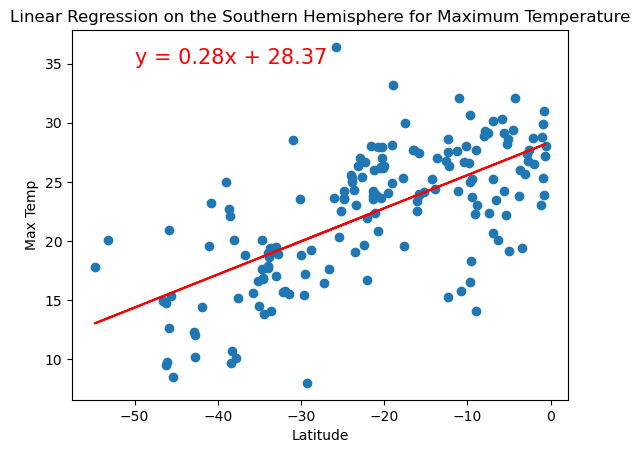

In [18]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values,
                       title='Linear Regression on the Southern Hemisphere for Maximum Temperature', 
                       y_label='Max Temp',
                       text_coordinates=(-50,35))

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.34193541590733256


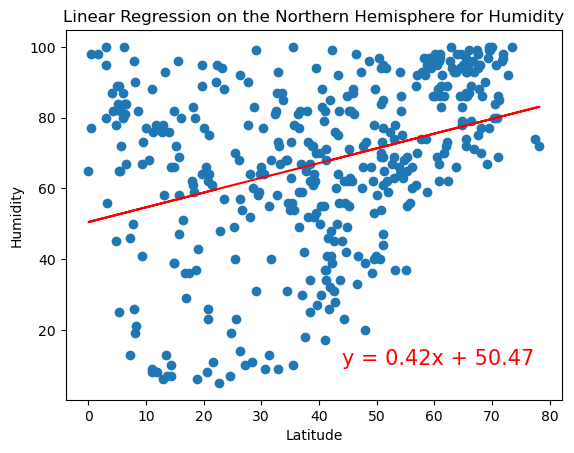

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       title='Linear Regression on the Northern Hemisphere for Humidity', 
                       y_label='Humidity',
                       text_coordinates=(44,10))

The r-value is: 0.2793098500245134


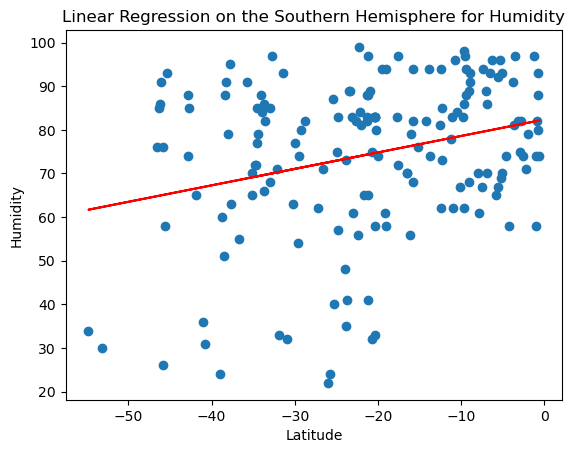

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values,
                       title='Linear Regression on the Southern Hemisphere for Humidity', 
                       y_label='Humidity',
                       text_coordinates=(-50,10))

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1256169378510918


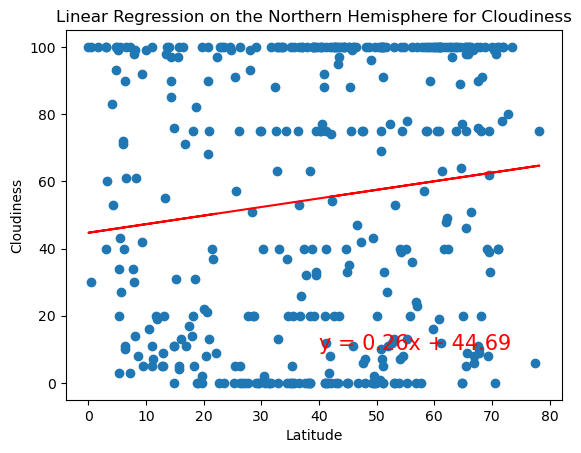

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Cloudiness', 'Cloudiness',(40,10))


The r-value is: 0.3948780930236232


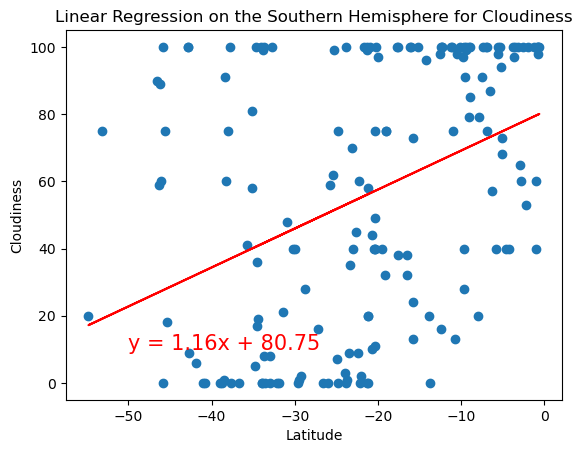

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Cloudiness', 'Cloudiness',(-50,10))

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0983128339935586


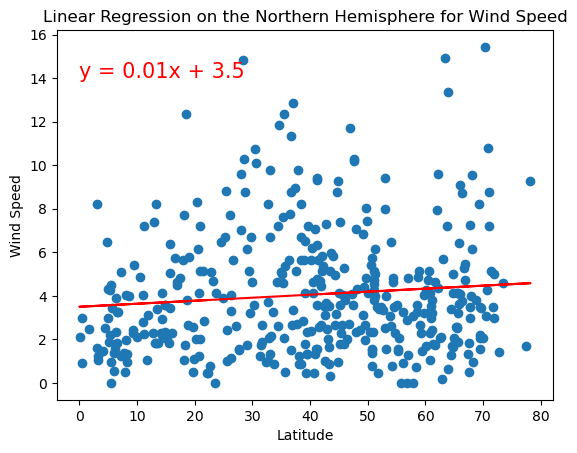

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(0,14))

The r-value is: -0.20505540760183072


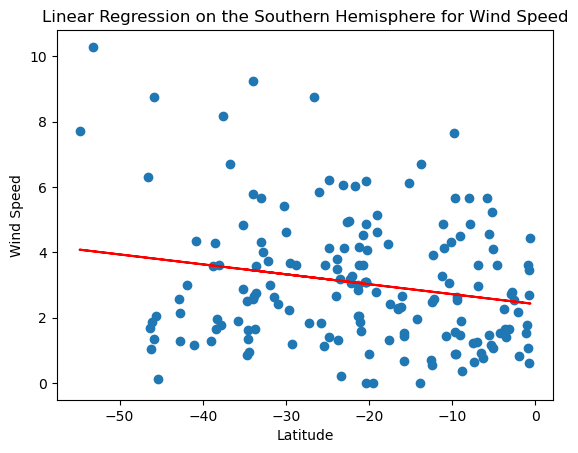

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,12))